# Lab Exercise 03: Exploring Wavenumbers and Spatial Sampling in Temperature Measurements

## Objective:
In this exercise, you will simulate measuring temperature across a field and explore how the spacing between sensors affects your ability to detect spatial features. You will calculate the fundamental wavenumber and Nyquist wavenumber and observe how changing the sensor spacing impacts your measurements.

**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2425-lastname/exercises/exercise_03_wavenumbers.ipynb**)

---
## Part 1: Simulating Temperature Across a Field

Task: Simulate a temperature field that varies across a 100-meter-wide field. Assume that the temperature varies in a sinusoidal manner across the field.

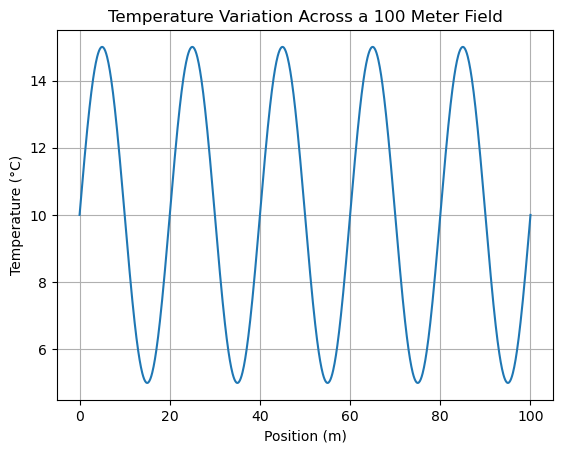

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the field
L = 100 # in meters

# Define the wavelength of the temperature wave (e.g., temperature changes every 20 meters)
wavelength = 20  # meters
k = 2 * np.pi / wavelength  # wavenumber

# Generate positions across the field (fine resolution)
x_fine = np.linspace(0, L, 1000)  # 1000 points across the field

# Generate the temperature variation across the field
temperature = 10 + 5 * np.sin(k * x_fine)  # Sinusoidal temperature wave

# Plot the temperature variation
plt.plot(x_fine, temperature)
plt.title(f"Temperature Variation Across a {L} Meter Field")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


### Questions:

What does the wavelength represent in this context? How often does the temperature change across the field?

The wavelength represents the temperature across the 100-m field. It changes every *5 m*.

---
## Part 2: Exploring Sensor Spacing

Now, we’ll simulate measuring the temperature using sensors placed at regular intervals across the field.

Task: Change the sensor spacing and observe how well you can capture the temperature wave.

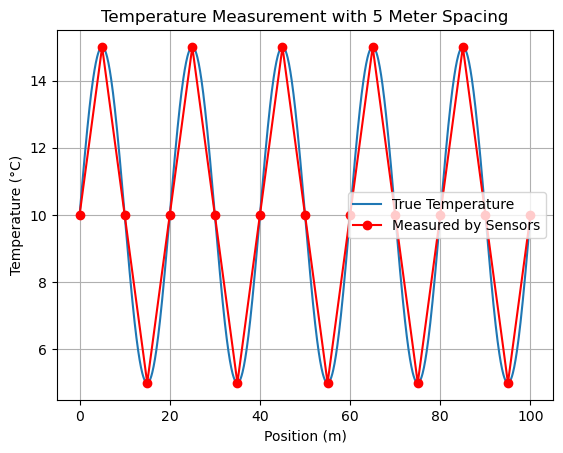

In [3]:
# Define the sensor spacing (e.g., 5 meters)
sensor_spacing = 5  # meters

# Generate positions where the sensors are placed
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)  # Sensor positions

# Measure the temperature at the sensor positions
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the temperature measured by the sensors
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors", color='r')
plt.title(f"Temperature Measurement with {sensor_spacing} Meter Spacing")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


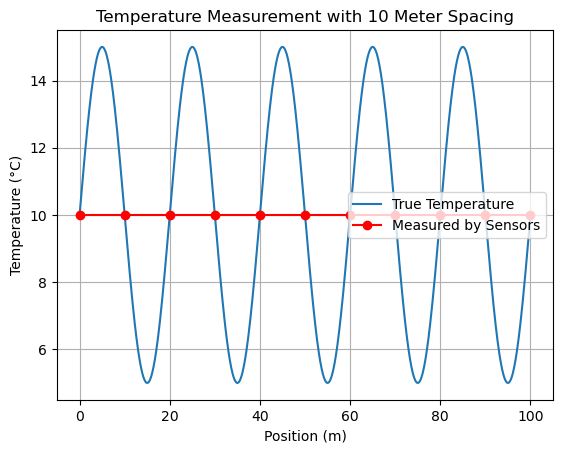

In [4]:
# Define the sensor spacing (e.g., 5 meters)
sensor_spacing = 10  # meters

# Generate positions where the sensors are placed
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)  # Sensor positions

# Measure the temperature at the sensor positions
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the temperature measured by the sensors
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors", color='r')
plt.title(f"Temperature Measurement with {sensor_spacing} Meter Spacing")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Questions:

1. How well does the sensor-based measurement (red line) match the true temperature variation?
2. What would happen if the spacing between the sensors was larger? Change the sensor spacing to 10 meters and re-run the code.

1. The sensor-based measurement captures the true temperature variation very well, but it misses out on smaller variations.
2. The sensor-based measurement still captures the true temperature every 10 m, but it does not capture the actual variation that occurs every 5 m.

---
## Part 3: Calculating Fundamental and Nyquist Wavenumbers

Task: Calculate the fundamental wavenumber and Nyquist wavenumber for the given scenario.

- The fundamental wavenumber represents the longest wave (or temperature trend) that spans the entire field.
- The Nyquist wavenumber represents the shortest wave that can be detected by your sensors.

In [5]:
# Calculate the fundamental wavenumber
L = 100  # Length of the field in meters
k_0 = 2 * np.pi / L  # Fundamental wavenumber

# Calculate the Nyquist wavenumber based on sensor spacing
sensor_spacing = 5
k_n = np.pi / sensor_spacing  # Nyquist wavenumber

# Print the results
print(f"Fundamental Wavenumber: {k_0:.3f} radians/m")
print(f"Nyquist Wavenumber (with {sensor_spacing}m spacing): {k_n:.3f} radians/m")


Fundamental Wavenumber: 0.063 radians/m
Nyquist Wavenumber (with 5m spacing): 0.628 radians/m


In [6]:
# Calculate the fundamental wavenumber
L = 100  # Length of the field in meters
k_0 = 2 * np.pi / L  # Fundamental wavenumber

# Calculate the Nyquist wavenumber based on sensor spacing
sensor_spacing = 10
k_n = np.pi / sensor_spacing  # Nyquist wavenumber

# Print the results
print(f"Fundamental Wavenumber: {k_0:.3f} radians/m")
print(f"Nyquist Wavenumber (with {sensor_spacing}m spacing): {k_n:.3f} radians/m")


Fundamental Wavenumber: 0.063 radians/m
Nyquist Wavenumber (with 10m spacing): 0.314 radians/m


### Questions:

1. What is the fundamental wavenumber? What does this tell you about the largest feature (or longest wave) you can detect in the field?
2. What is the Nyquist wavenumber for 5-meter spacing? What about for 10-meter spacing? How does increasing the sensor spacing affect your ability to detect smaller features?

1. The fundamental wavenumber is *0.063 radians/m*. This says that the longest wave that can be resolved in the field is up to 0.063 radians per meter.
2. The Nyquist wavenumber for 5-m spacing is *0.628 radians/m*, and *0.314 radians/m* for 10-m spacing. Increasing the sensor spacing increases my ability to detect smaller features.

---
### Part 4: Aliasing and Sampling Resolution

When the sensor spacing becomes too large (i.e. sensors are further apart), we may not be able to detect certain temperature variations correctly due to aliasing. Let's explore this concept.

Task: Increase the sensor spacing to 15 meters and observe the effect.

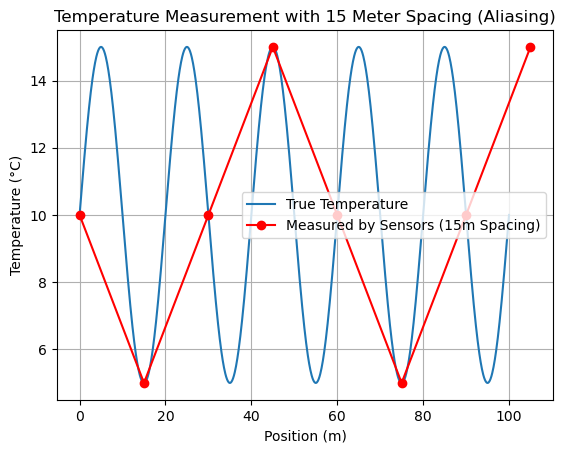

In [8]:
# Increase the sensor spacing to 15 meters
sensor_spacing =  15 # meters
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (15m Spacing)", color='r')
plt.title("Temperature Measurement with 15 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Questions:

1. What happens to the accuracy of your temperature measurements when the sensor spacing is increased to 15 meters?
2. Explain aliasing in this context. Why does it occur when the sensor spacing exceeds a certain limit?

1. The measurements fail to capture the variations in true temperature in between sensor placements.
2. The sampling interval (sensor spacing) is too large, which leads to undersampling of the data.

### Final Questions

1. How does sensor spacing affect your ability to resolve both large-scale and small-scale temperature changes across the field?
2. How do the fundamental wavenumber and Nyquist wavenumber help you determine the types of temperature variations you can detect?
3. Why is it important to consider both the spatial resolution (sensor spacing) and the wavenumbers when designing a measurement system for temperature or other physical parameters?

### Answers

1. Sensor spacing determines the size of changes/variations that sensor measurements can capture across the field (how fine details can get and still be resolved by the sensor). 
2. The fundamental wavenumber sets the scale of data that can be captured by the sensor, while the Nyquist wavenumber sets the smallest feature that the sensor can resolve.
3. Spatial resolution and wavenumbers are important in ensuring that a sensor can observe how a physical parameter changes over time. These changes form the basis for the trends and mechanisms that define phenomena and climate as we know it today.